Versuch 1 - Code 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

1. Ermittlung der Kennlinie des Abstandssensors 

In [2]:
distances = range(10, 71, 3)
volt = ([1.370, 1.218, 1.104, 0.9627, 0.8884, 0.8066, 0.7289, 0.6666, 0.6517, 0.6097, 0.5713, 0.5575, 0.529, 0.4923, 0.4732, 0.4584, 0.4285, 0.4131, 0.3882, 0.3869, 0.3736])

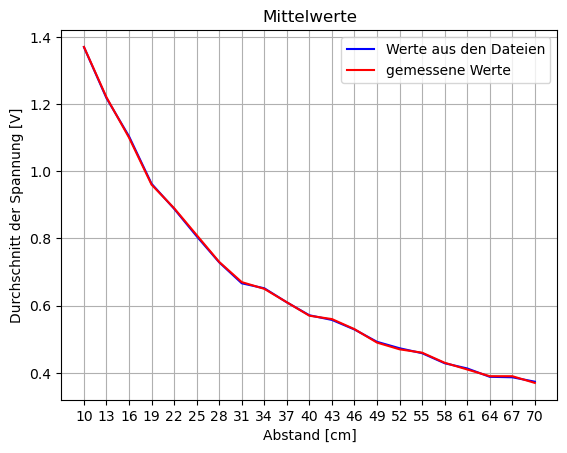

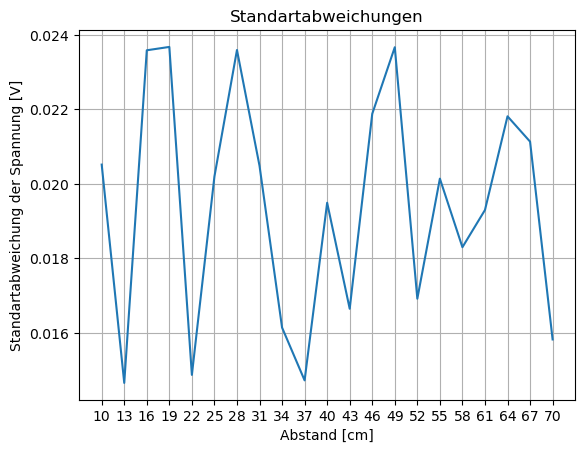

Mittelwert: 1.3695188740857505, Gemessene Spannung: 1.37
Mittelwert: 1.2176462683690628, Gemessene Spannung: 1.218
Mittelwert: 1.103647812979193, Gemessene Spannung: 1.104
Mittelwert: 0.9626291900767129, Gemessene Spannung: 0.9627
Mittelwert: 0.8883363007839427, Gemessene Spannung: 0.8884
Mittelwert: 0.8065570832692308, Gemessene Spannung: 0.8066
Mittelwert: 0.7288366590374106, Gemessene Spannung: 0.7289
Mittelwert: 0.6665313391025641, Gemessene Spannung: 0.6666
Mittelwert: 0.6516509013892391, Gemessene Spannung: 0.6517
Mittelwert: 0.6097425424453551, Gemessene Spannung: 0.6097
Mittelwert: 0.5712669120081967, Gemessene Spannung: 0.5713
Mittelwert: 0.5574894785308954, Gemessene Spannung: 0.5575
Mittelwert: 0.5289758485456074, Gemessene Spannung: 0.529
Mittelwert: 0.49228076727616643, Gemessene Spannung: 0.4923
Mittelwert: 0.4731972680590584, Gemessene Spannung: 0.4732
Mittelwert: 0.45842087639554413, Gemessene Spannung: 0.4584
Mittelwert: 0.4285624549001681, Gemessene Spannung: 0.4285
M

In [4]:
def read_data(file_path):
	data = np.genfromtxt(file_path, delimiter=';', skip_header=1+1000, dtype=float, usecols=(1), converters={1: lambda s:float(s.decode('utf-8').replace(',','.'))})
	return data

#Liste für die Daten 
all_data = []
#Schleife für alle Dateien 
for i in range(10,71,3):
	file_path = f'C:/Users/pbegu/OneDrive/Dokumente/Hs-Studium/3_SS 24/SSS/Übungen/SSS/versuch1/Abstand{i}.csv'
	data = read_data(file_path)
	#print("Daten für Abstand", i, "cm:", data)
	all_data.append(data)


def calculate_mean(all_data):
	mean_values = []
	for data_array in all_data:
		mean_value = np.mean(data_array)
		mean_values.append(mean_value)
	return mean_values

def calculate_std_deviation(all_data):
	std_deviations = []
	for data_array in all_data:
		std_deviation = np.std(data_array)
		std_deviations.append(std_deviation)
	return std_deviations



def plot_mean(mean_values):
	distances = range(10, 71, 3)
	volt = ([1.37, 1.22, 1.10, 0.96, 0.89, 0.81, 0.73, 0.67, 0.65, 0.61, 0.57, 0.56, 0.53, 0.49, 0.47, 0.46, 0.43, 0.41, 0.39, 0.39, 0.37])
	plt.plot(distances, mean_values, linestyle='-', color='blue', label='Werte aus den Dateien')
	plt.plot(distances, volt, linestyle='-', color='red', label='gemessene Werte')
	plt.xlabel('Abstand [cm]')
	plt.ylabel('Durchschnitt der Spannung [V]')
	plt.title('Mittelwerte')
	plt.xticks(distances)
	plt.legend()
	plt.grid(True)
	plt.show()

def plot_std_deviation(std_deviations):
	distances = range(10, 71, 3)
	plt.plot(distances, std_deviations, linestyle='-')
	plt.xlabel('Abstand [cm]')
	plt.ylabel('Standartabweichung der Spannung [V]')
	plt.title('Standartabweichungen')
	plt.xticks(distances)
	plt.grid(True)
	plt.show()

mean_values = calculate_mean(all_data)
plot_mean(mean_values)

std_deviations = calculate_std_deviation(all_data)
plot_std_deviation(std_deviations)

# Ausgabe der Werte aus den Arrays nebeneinander
for i in range(len(mean_values)):
    print(f"Mittelwert: {mean_values[i]}, Gemessene Spannung: {volt[i]}")


*Bemerkung*: Durch das Aufrunden der Nachkommastellen der gemessenen Werte, erhält man eine kleine Diffrenz im Vergleich zu den Mittelwerten (keine genaue Übereinstimmung). Ohne das Aufrunden erkennt man keine Differenz (die Graphen liegen übereinander).

2. Modellierung der Kennlinie durch lineare Regression

- Eingangswerte --> gemessene Spannung in Volt
- Ausgangswerte --> Abstände 

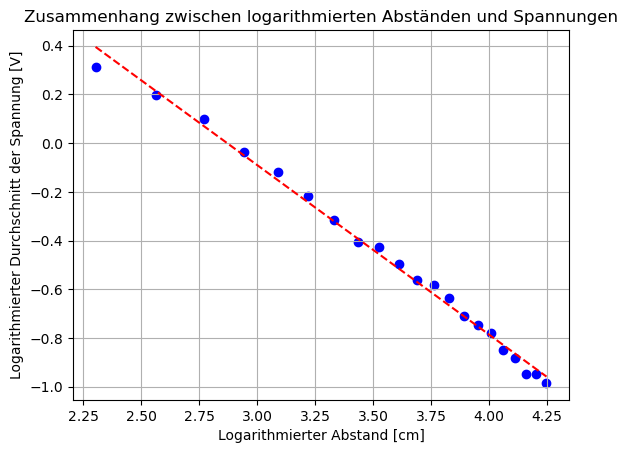

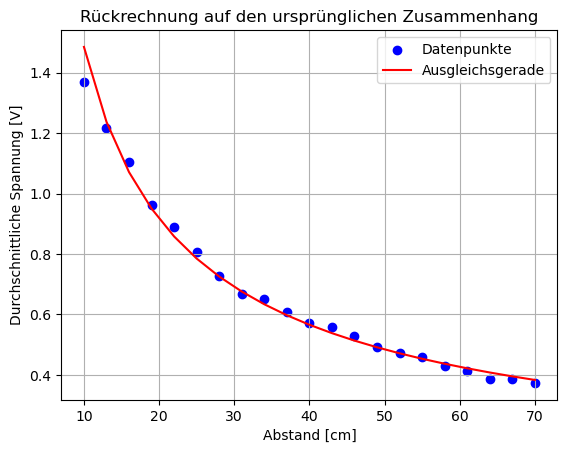

In [9]:
#2.1
#Abstände logarithmieren
log_distances = np.log(distances)

#Mittelwert der gemessenen Spannungen logarithmieren 
log_mean_values = np.log(mean_values)

# Erstellen der Linie für die Regression
regression_line_x = np.linspace(np.min(log_distances), np.max(log_distances), 100)

#2.2
x_mean = np.mean(log_distances)
y_mean = np.mean(log_mean_values)
numerator = np.sum((log_distances - x_mean) * (log_mean_values - y_mean))
denominator = np.sum((log_distances - x_mean)**2)

a = numerator / denominator
b = y_mean - a * x_mean

#Berechnung der Regressionsgerade
regression_line_y = a * regression_line_x + b

# Rückrechnung auf den ursprünglichen Zusammenhang
distance_values = np.exp(b + a * log_distances)

#Zusammenhang zwischen logarithmierten Abständen und Spannungen
plt.scatter(log_distances, log_mean_values, color='blue')
plt.plot(regression_line_x, regression_line_y, color='red', linestyle='--', label='Regressionsgerade')
plt.xlabel('Logarithmierter Abstand [cm]')
plt.ylabel('Logarithmierter Durchschnitt der Spannung [V]')
plt.title('Zusammenhang zwischen logarithmierten Abständen und Spannungen')
plt.grid(True)
plt.show()

# Datenpunkte und Ausgleichsgerade visualisieren
plt.scatter(distances, mean_values, color='blue', label='Datenpunkte')
plt.plot(distances, distance_values, color='red', label='Ausgleichsgerade')
plt.xlabel('Abstand [cm]')
plt.ylabel('Durchschnittliche Spannung [V]')
plt.title('Rückrechnung auf den ursprünglichen Zusammenhang')
plt.legend()
plt.grid(True)
plt.show()


3. Flächenmessung mit Fehlerrechnung

In [12]:
breite =  np.genfromtxt('C:/Users/pbegu/OneDrive/Dokumente/Hs-Studium/3_SS 24/SSS/Übungen/SSS/versuch1/DINA4b.csv',delimiter=';', skip_header=1+1000, dtype=float, usecols=(1), converters={1: lambda s:float(s.decode('utf-8').replace(',','.'))})
laenge = np.genfromtxt('C:/Users/pbegu/OneDrive/Dokumente/Hs-Studium/3_SS 24/SSS/Übungen/SSS/versuch1/DINA4l.csv',delimiter=';', skip_header=1+1000, dtype=float, usecols=(1), converters={1: lambda s:float(s.decode('utf-8').replace(',','.'))})

#Berechnung der Mittelwerte und Standartabweichungen
mean_breite = np.mean(breite)
std_breite = np.std(breite)
mean_laenge = np.mean(laenge)
std_laenge = np.std(laenge)

#Korrektur des Messefehlers aufgrund der Anzahl der Messungen (Formel s/Wurzel(n))
emp_std_breite = std_breite / np.sqrt(len(breite))
emp_std_laenge = std_laenge / np.sqrt(len(laenge))

#Ableitungskennlinie, um Fehler auf den Abstand zu berechnen (partielle Ableitungen)
ableitung_lang = (np.exp(b) * a * np.mean(laenge) ** (a - 1))
ableitung_kurz = (np.exp(b) * a * np.mean(breite) ** (a - 1))

#Vertrauensbereiche berechnen -> Faktoren t bei Sicherheit P
intervall_breite_68 = (mean_breite + 1 * emp_std_breite, mean_breite - 1 * emp_std_breite)
intervall_breite_95 = (mean_breite + 1.96 * emp_std_breite, mean_breite - 1.96 * emp_std_breite)
intervall_laenge_68 = (mean_laenge + 1 * emp_std_laenge, mean_laenge - 1 * emp_std_laenge)
intervall_laenge_95 = (mean_laenge + 1.96 * emp_std_laenge, mean_laenge - 1.96 * emp_std_laenge)


print('Vertrauensbereich 68% breite:' + str(intervall_breite_68))
print('Vertrauensbereich 95% breite:' + str(intervall_breite_95))
print('Vertrauensbereich 68% laenge:' + str(intervall_laenge_68))
print('Vertrauensbereich 95% laenge:' + str(intervall_laenge_95))

print("Kurze Seite (P=68,26%): ", mean_breite, " +- ", std_breite * 1)
print("Kurze Seite (P=95%): ", mean_breite, " +- ", std_breite * 1.98)
print("Lange Seite (P=68,26%): ", mean_laenge, " +- ", std_laenge * 1)
print("Lange Seite (P=95%): ", mean_laenge, " +- ", std_laenge * 1.98)


#Gaußsche Fehlerfortpflanzungsgesetz ΔZ = sqrt((ΔX * Y)^2 + (ΔY * X)^2) (wobei ΔX und ΔY die Standartabweichungen sind)
#für den 68% Vertrauensbereich
fehler_fortpflanzung_68 = np.sqrt(((ableitung_lang * std_breite * 1)**2) + ((ableitung_kurz * std_laenge * 1)**2))
##für den 95% Vertrauensbereich
fehler_fortpflanzung_95 = np.sqrt(((ableitung_lang * std_breite * 1.96)**2) + ((ableitung_kurz * std_laenge * 1.96)**2))
#damit man statt ein Array nur einen Wert von Fehlerfortpflanzungen hat 
fehler_fortpflanzung_68_mean = np.mean(fehler_fortpflanzung_68)
fehler_fortpflanzung_95_mean = np.mean(fehler_fortpflanzung_95)

print('Fehlerfortpflanzung 68%: +-' + str(fehler_fortpflanzung_68_mean))
print('Fehlerfortpflanzung 95%: +-' + str(fehler_fortpflanzung_95_mean))

#Flächenmessung
x_kurz = (mean_breite / np.exp(b)) ** (1 / a)
x_lang = (mean_laenge / np.exp(b)) ** (1 / a)
flaeche = x_kurz * x_lang
print('strecke kurz: ' + str(x_kurz) + ' strecke lang: ' + str(x_lang) + ', flaeche = ' + str(flaeche) + 'cm^2')

Vertrauensbereich 68% breite:(0.9246225784327617, 0.9244842810144844)
Vertrauensbereich 95% breite:(0.9246889611935349, 0.9244178982537112)
Vertrauensbereich 68% laenge:(0.7485107973193149, 0.7484094033301182)
Vertrauensbereich 95% laenge:(0.7485594664341294, 0.7483607342153037)
Kurze Seite (P=68,26%):  0.9245534297236231  +-  0.021331003837445697
Kurze Seite (P=95%):  0.9245534297236231  +-  0.04223538759814248
Lange Seite (P=68,26%):  0.7484601003247165  +-  0.015639016256345187
Lange Seite (P=95%):  0.7484601003247165  +-  0.03096525218756347
Fehlerfortpflanzung 68%: +-0.20083104061680668
Fehlerfortpflanzung 95%: +-0.39362883960894113
strecke kurz: 19.755827538893165 strecke lang: 26.766447669111415, flaeche = 528.7933239797741cm^2
